# Lista de exercícios da prova 1

Resolução da lista de exercícios utilizadad na matéria de processamento de imagems. Neste caso, eu fiz uma readaptação de algumas questões para ficar mais fácil de visualizar no jupyter notebook. Este é o [link](https://docs.google.com/document/d/17wDGblrp1eTug9I816IfjZTTMHVyfDHveZ9PM46HJDQ/edit#) de referência utilizado

## Questão 1

Para esta questão da lista, Podemos fazer duas soluções :

1 - Podemos passar a imagem de RGB para escala de cinza e aplicar a normalização do histograma
2 - Podemos converte a imagem na escala RGB para HSV e com isso, calculamos a equalização do histograma na camada de luminância (V) e depois retornamos para a o canal RGB. Note que Hue, Saturation e Value of brightness

A referência desta resposta foi tirada neste [link](https://www.lifewire.com/what-is-hsv-in-design-1078068)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histogram_equalization(img_in: np.ndarray) -> np.ndarray:
    # segregate color streams
    hsv_img = cv2.cvtColor(img_in, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
    # validation
    equ_v = cv2.equalizeHist(v)
    equ = cv2.merge((h, s, equ_v))
    img_out = cv2.cvtColor(equ, cv2.COLOR_HSV2RGB)
    cv2.imwrite('RespostaPer1/output_name.png', img_out[..., ::-1])
    plt.imshow(img_out, vmin=img_out.min(), vmax=img_out.max())
    plt.axis("off")
    plt.show()
    return img_out

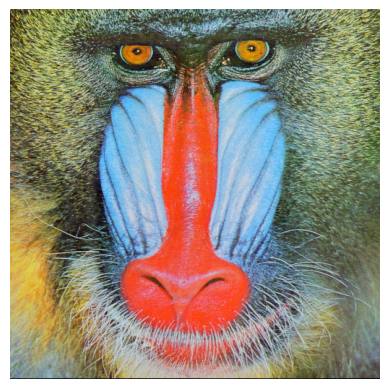

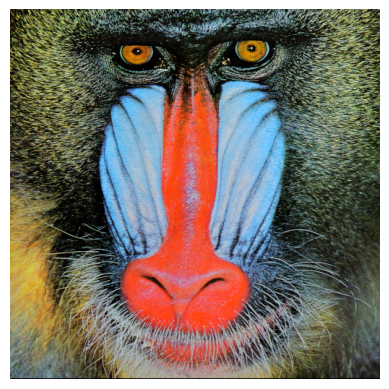

In [2]:
babbon_img = cv2.imread("baboon.png")

plt.imshow(babbon_img[...,::-1], vmin=babbon_img.min(), vmax=babbon_img.max())
plt.axis("off")
plt.show()
res_img = histogram_equalization(babbon_img)

## Questão 2

Queremos utilizar o **média ou mediana quando queremos alterar valores de um _pixel_ baseado em seus vizinhos mais próximos em uma vizinhança $n$ x $n$ de uma imagem**. A referência é encontrada neste [link](https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm#:~:text=By%20calculating%20the%20median%20value,affect%20the%20median%20value%20significantly)

Além disso, é recomendo utilizar esses tipos de filtros quando a [**imagem apresenta características de _salt-n-peppers_**](https://stackoverflow.com/questions/20638912/should-i-choose-mean-or-median-filter-for-gaussian-noise#:~:text=As%20a%20general%20rule%20of,to%20approximate%20the%20gaussian%20filter). Ou seja, geralmente são utilizados para **diminuir ruidos na imagem, sendo considerados como filtros de passa-baixa**

### Filtro da média
O filtro da média é calculado tirando a média dos valores de uma vizinhança, sendo este o novo valor do limiar para alguma técnica de _threshold_.

### Filtro da mediana

Esse filtro também considerado como um filtro local. Essa técnica envolve em organizar os valores de forma crescente em uma janela e pegar o "valor do meio" como o valor para o _threshold_ adotado.

### Conclusão dos filtros
De modo geral, o **filtro da mediana apresenta um melhor desempenho se comparado com o filtro da média**.

Isto porque a mediana é mais robusta para variações, comparado com a média, e consegue filtrar melhores os valores _outliers_ dentro desta vizinhança.

Além disso, como o valor da mediana será um valor real dentro da vizinhança, este método não cria valores de _pixels_ que não são condizentes com a realidade quando o filtramos uma borda. Desta forma, este filtro preserva muito mais a informação dessas bordas comparado com o outro filtro.

A sua única desvantagem é que o método da mediana é mais custoso que o método da média, já que ele exige ordenar o intervalo dos valores da janela.

## Questão 3

Os filtros Gaussianos agem de forma similar aos filtros de média ao suavizar as imagens. Porém, em filtros gaussianos, a suavização da imagem é realizada por meio da **substituição de cada _pixel_ por uma média ponderada dos _pixels_ vizinhos, tal que o peso dado a um vizinho decresce monotonicamente com a distância do _pixel_ central**. Esse decrescimento monotônico característico do filtro Gaussiano gera menos disparidades nos valores entre vizinhos, resultando numa imagem mais suave.

Em **duas dimensões são filtros isotrópicos, ou seja, o grau de suavização é o mesmo em todas as direções**.

Além disso, os filtros Gaussianos são separáveis, ou seja, podem ser aplicados em duas passadas 1D (uma horizontal e outra vertical), ao invés de uma passada 2D. Isso faz com que exijam menos cálculos e, portanto, sejam mais eficientes computacionalmente do que filtros não separáveis como o da mediana.
Ainda, o grau de suavização do filtro pode ser escolhido de acordo com o desvio padrão da gaussiana $\sigma = \sqrt{n - 1/2}$, permitindo flexibilidade em seu uso.

## Questão 4

Inicialmente, iremos definir que cada pixel de uma matriz $I_{m}$ com $n$ x $n$ é da forma

$$
I_{m}(x, y) = |x - y|
$$

Dessa forma, vamos criar a função para inicializar a matriz

In [3]:
def init_matrix(n: int) -> np.ndarray:
    img = np.zeros(shape=(n, n), dtype=np.uint8)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x, y] = np.abs(x - y)

    return img

De forma particular, queremos que $n = 7$. Porntanto, teremos que

In [4]:
img = init_matrix(7)
print(img)

[[0 1 2 3 4 5 6]
 [1 0 1 2 3 4 5]
 [2 1 0 1 2 3 4]
 [3 2 1 0 1 2 3]
 [4 3 2 1 0 1 2]
 [5 4 3 2 1 0 1]
 [6 5 4 3 2 1 0]]


Agora, vamos criar a função que calcula a mediana de uma função usando _numpy_ e _generic_filters do scipy_

In [5]:
from scipy.ndimage import generic_filter


def _median_filter_block(img_block: np.ndarray) -> int:
    return int(np.median(img_block))


def median_filter_vec(img: np.ndarray, n: int) -> np.ndarray:
    median_img = generic_filter(img, _median_filter_block, n, mode="reflect")
    return median_img


print("filtro dá média para uma vizinhança 3x3")
print(median_filter_vec(img, 3))

filtro dá média para uma vizinhança 3x3
[[0 1 2 3 4 5 5]
 [1 1 1 2 3 4 5]
 [2 1 1 1 2 3 4]
 [3 2 1 1 1 2 3]
 [4 3 2 1 1 1 2]
 [5 4 3 2 1 1 1]
 [5 5 4 3 2 1 0]]


OBS : Nesse modelo, está vetorizado e não está fazendo um tratamento adequado das bordas. Para isso, teriamos que fazer de forma iterativa de tal forma que verificamos se o píxel está na beirada ou não. Caso ele esteja, só desconsideramos utilizar a mediana do bloco $3$x$3$.

TODO : Criar uma fórmula para o caso Geral quando conseguir um tempinho livre

In [6]:
def median_filter_loop(img: np.ndarray) -> np.ndarray:
    median_img = img.copy()

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # verificando se o bloco é fronteira
            if ((x - 1 >= 0 and
                 y - 1 >= 0 and
                 x + 1 < img.shape[0] and
                 y + 1 < img.shape[1])):
                median_block = np.zeros(shape=(3, 3), dtype=img.dtype)

                median_block[0, 0] = img[x - 1, y - 1]
                median_block[0, 1] = img[x - 1, y]
                median_block[0, 2] = img[x - 1, y + 1]

                median_block[1, 0] = img[x, y - 1]
                median_block[1, 2] = img[x, y + 1]

                median_block[2, 0] = img[x + 1, y - 1]
                median_block[2, 1] = img[x + 1, y]
                median_block[2, 2] = img[x + 1, y + 1]

                median_img[x, y] = np.median(median_block)

    return median_img


print(median_filter_loop(img))

[[0 1 2 3 4 5 6]
 [1 1 1 2 3 4 5]
 [2 1 1 1 2 3 4]
 [3 2 1 1 1 2 3]
 [4 3 2 1 1 1 2]
 [5 4 3 2 1 1 1]
 [6 5 4 3 2 1 0]]


## Questão 5

Incialmente, é desejado que estes operadores de bordas apresentem as seguintes características :
* Produzir o mínimo de falsos negativos e falsos positivos
* Seja robusto na presença de ruído _sal e pimenta_
* apresente alta precisão
* Exija pouco custo computacional
* Idealmente, mas não é necessário, é desejável que estes filtros sejam isotrópicos. Com isso, sendo mais robustos a ruídos e gerando o mesmo resultado idenpendente da ordem de aplicação do filtro

## Questão 6

### Resolução espacial
A resolução espacial está associada à **densidade de _pixels_ da imagem**. Desta forma, **quanto maior a
densidade de _pixels_ em uma imagem, maior será a resolução da imagem**. Consequentemente, menor será o intervalo de amostragem entre os _pixels_ da imagem.

É importante notar que uma imagem contendo um grande número de _pixels_ não necessariamente possui resolução maior do que outra contendo menor número de _pixels_.

A resolução de uma imagem deve ser escolhida de modo a atender ao grau de detalhes que devem ser discerníveis na imagem.

### Profundidade da imagem

O número de nı́veis de quantização da imagem $f(x, y)$ é normalmente uma potência de 2, ou seja, $L = 2^b$ , em que $L$ é o número de
nı́veis de cinza da imagem e $b$ é chamado de profundidade da imagem.

Assim, a profundidade de uma imagem corresponde ao **número de _bits_ necessários para armazenar a imagem digitalizada**.

#### Exemplo
Seja $L = 256$. Isso significa que cada _pixel_ pode ter associado um valor de cinza entre 0 e $255$. A profundidade da imagem, neste caso, é de 8 _bits_ por _pixel_.


## Questão 7

Para esta questão, vamos separar em dois ítens para responder estas questões

### Item A

Temos que ambas as regiões $R_{1}$ e $R_{2}$ estão conectadas para os dois tipos de visinhança

### Item B

Para a visinhança 4, temos **9** componentes conectadas.

Para a visinhança 8, temos **4** componentes conectadas.

## Questão 8

Idealmente, a **detecção de bordas é uma operação de identificação de mudanças locais significativas dos níveis de cinza de uma imagem**. Desta forma, podemos descrever essas mudanças utilizando o conceito de derivadas. Além disso, como uma imagem depende de duas coordenadas espaciais, as **bordas das imagens podem ser expressas por derivadas parciais, principalmente de primeira ordem e segunda ordem (Laplaciano)**.

Com isso, uma operação comum é adotar a derivada como o gradiente da imagem da forma

$$
\nabla f(x,y) = (\frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y})
$$

Desta forma, podemos definir se um _pixel_ existe na borda se satisfazer a condição

$$
\sqrt{(\frac{\partial f(x, y)}{\partial x})^{2} + (\frac{\partial f(x, y)}{\partial y})^{2}} > T
$$

com $T \in [0, 255]$

## Questão 9.1

 A idea desta parte é criar uma reta da forma $b = -mx + y$ para cada coordenada e calcular os seus valores desejados.

Vamos analisar em um exemplo. Dado os pontos (1, 2), (2, 3), (3, 4). Vamos montar uma equação que seja da seguinte forma nas coordenadas (m, b).

### Para os pontos (1, 2)

#### Se $b_{1}$ = 0

$$ 0 = 2 - m \implies m = 2$$

#### Se $m_{1}$ = 0

$$ b = 2 - 0*x \implies b = 2$$

#### Portanto, temos que $(m_{1}, b_{1}) = (2, 2)$

### Para os pontos (2, 3)

#### Se $b_{2}$ = 0

$$ 0 = 3 - 2m \implies m = 1.5$$

#### Se $m_{2}$ = 0

$$ b = 3 - 0*x \implies b = 3$$

#### Portanto, temos que $(m_{1}, b_{1}) = (1.5, 3)$

### Para os pontos (3, 4)

#### Se $b_{3}$ = 0

$$ 0 = 4 - 3m \implies m = 1.33$$

#### Se $m_{3}$ = 0

$$ b = 4 - 0*x \implies b = 4$$

#### Portanto, temos que $(m_{1}, b_{1}) = (1.33, 4)$


### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{1}, b_{1})$
$$
R_{1} = a_{1} + c_{1} \implies 2 = c_{1} \implies 0 = 2*a_{1} + c_{1} \implies a_{1} = -1
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{2}, b_{2})$
$$
R_{2} = a_{2} + c_{2} \implies 3 = c_{2} \implies 0 = 1.5*a_{2} + c_{2} \implies a_{2} = -2
$$

### Agora, vamos ver como as retas se intersectam

$$-x + 2 = -2x + 3 \implies x = 1$$

Agora, substituindo em alguma das duas equações, temos que $-1 + 2 = 1$ (coeficiente translação). Com isso, temos que a equação original é da forma

$$
y = x + 1
$$

## Questão 9

QuestãoDado os pontos (1, 3), (2, 6), (4, 12). Vamos montar uma equação que seja da seguinte forma nas coordenadas (m, b).

### Para os pontos (1, 3)

#### Se $b_{1}$ = 0

$$ 0 = 3 - m \implies m = 3$$

#### Se $m_{1}$ = 0

$$ b = 3 - 0*x \implies b = 3$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 3)$

### Para os pontos (2, 6)

#### Se $b_{2}$ = 0

$$ 0 = 6 - 2m \implies m = 3$$

#### Se $m_{2}$ = 0

$$ b = 6 - 0*x \implies b = 6$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 6)$

### Para os pontos (4, 12)

#### Se $b_{3}$ = 0

$$ 0 = 12 - 4m \implies m = 3$$

#### Se $m_{3}$ = 0

$$ b = 12 - 0*x \implies b = 12$$

#### Portanto, temos que $(m_{1}, b_{1}) = (3, 12)$


### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{1}, b_{1})$
$$
R_{1} = a_{1} + c_{1} \implies 3 = c_{1} \implies 0 = 3*a_{1} + 3 \implies a_{1} = -1
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{2}, b_{2})$
$$
R_{2} = a_{2} + c_{2} \implies 6 = c_{2} \implies 0 = 3*a_{2} + 6 \implies a_{2} = -2
$$

### Agora, vamos calcular as retas dos pontos $(m, b) = (x', y')$. Com $(m, b) = (m_{3}, b_{3})$
$$
R_{3} = a_{3} + c_{3} \implies 12 = c_{3} \implies 0 = 3*a_{3} + 12 \implies a_{3} = -4
$$

### Agora, vamos ver como as retas se intersectam. Note que as retas $R_{2}$ e $R_{3}$ são combinações lineares entre si

$$-x + 3 = -2x + 6 \implies x = 3$$

Agora, substituindo em alguma das duas equações, temos que $-3 + 3 = 0$ (coeficiente de translação). Com isso, temos que a equação original é da forma

$$
y = 3x
$$

## Questão 10

Sabemos que a distância _city-block_ de visinhança 4 é definida da forma sendo

$$
D_{4}(a, b) = |x_{1} - x_{2}| + |y_{1} - y_{2}|
$$

onde $a$, $b$ são os pontos que queremos medir as distâncias e $k$ é a quantidade de arestas que ligam estes pontos

Podemos mostrar visualmente que basta ligar estas contando como uma visinhança de 4 visinhos (bem similar a questões de ensino médio).

Note que o caminho **não é único**. Vamos supor o seguinte exemplo

![City block 4](city_block.jpg "City block 4")

Neste exemplo, note que existem múltiplos caminhos para chegar ao mesmo ponto B

## Questão 11

Para esta questão, vamos criar uma função que normaliza os valores dado um intervalo desejado

In [7]:
def change_img_range(img: np.ndarray, start_range: int, end_range: int) -> np.ndarray:
    img_transform = img.copy()
    print("valor de pixel mínimo da antes da transformação : {}".format(img_transform.min()))
    print("valor de pixel máximo da antes da transformada : {}".format(img_transform.max()))

    # Normalizando a imagem o intervalo [0, 1]
    img_transform = (img_transform - np.min(img_transform)) / np.ptp(img_transform)
    new_range = (end_range - start_range)

    # Normalizando a imagem no intervalo [start_range, end_range] como np.uint8
    img_transform = (
                (new_range * (img_transform - np.min(img_transform)) / np.ptp(img_transform)) + start_range).astype(
        img.dtype)

    print("valor de pixel mínimo após a transformada : {}".format(img_transform.min()))
    print("valor de pixel máximo após a transformada : {}".format(img_transform.max()))
    return img_transform


f = change_img_range(babbon_img, 0, 60)

valor de pixel mínimo da antes da transformação : 0
valor de pixel máximo da antes da transformada : 255
valor de pixel mínimo após a transformada : 0
valor de pixel máximo após a transformada : 60


In [8]:
z = change_img_range(f, 10, 210)

valor de pixel mínimo da antes da transformação : 0
valor de pixel máximo da antes da transformada : 60
valor de pixel mínimo após a transformada : 10
valor de pixel máximo após a transformada : 210


## Questão 12

Vamos comparar a medida _semi-euclidiana_ com outras medidas de distância

### Euclidana

Podemos notar que a distância euclidiana é da forma

$$
D(a, b) = \sqrt{(x_{1} - x_{2})^{2} + (y_{1} - y_{2})^{2}}
$$

Note que a distância Euclidiana mede a **menor distância entre dois pontos juntando uma reta**. Em quesito matemático, a distância _semi-euclidiana_ é **menos-preciso em encontrar a menor distância, já que ela tenta aproximar com uma reta**. Porém, note que a distância Euclidiana apresenta uma operação computacionamente custosa de elevar números ao quadrado.

Desta forma, temos que a a distância _semi-euclidiana_ é **computacionalmente menos custosa em troca de uma menor precisão matemática da distância**

### City-Block

Como visto anteriormente, esta operação possui o mesmo custo computacional que a distância _semi-euclidiana_. Entretando, é importante enfatizar que esta distância $D_{4}$ leva em consideração uma distância como se os _pixels_ estivessem em uma malha quadriculada e percorrendo considerando uma visnhança 4.

### Chessboard

Neste caso, temos que a distância é definida sendo

$$
D_{8}(a, b) = \max(|(x_{1} - x_{2}|, |y_{1} - y_{2}|)
$$

Note que, em questão de custo computacional. Este método é computacionalmente **menos custoso comparado com o modelo _semi-euclidiano_**. Essa medida é uma extensão do modelo _city-block_, porém para uma visinhança de 8 _pixels_.

Por fim, abaixo é possível ver a comparação entre as distâncias

![Comparação entre as distâncias](Comp_dist.jpg "Comparação entre as distâncias")

## Questão 13

A entropia é uma medida da **quantidade de informação presente em um sinal**. A entropia de uma imagem pode ser descrita como o negativo da soma das probabilidades de cada intensidade de cinza vezes o logaritmo dessa probabilidade, ou seja

$$
H = - \sum_{i=0}^{L_{max}} p_{i} \log{p_{i}}
$$

Por isso que imagens **perfeitamente homogêneas e com apenas uma cor têm entropia zero**, enquanto que imagens com um **número igual de todos os níveis de cinza têm entropia máxima**.

## Questão 14

Vamos separar esta questão em duas partes

### Operadores de soma

Operadores aritméticos de soma entre duas imagens podem ser usado para sobrepor uma máscara à imagem.

Por exemplo, podemos utilizar a soma para **adicionar várias bordas detectadas em uma máscara de rótulos ou ainda somar o resultado de uma máscara de segmentação para vários objetos**. Isso é muito útil para que humanos observem o resultado dessas operações e rapidamente consigam avaliar se os resultados foram razoáveis. Também pode ser utilizado para adicionar ruído em uma imagem

### Operadores de subtração

Já os operadores aritméticos de subtração entre duas imagens **ressaltam os _pixels_ diferentes nas duas**. Assim, ele é muito útil para **detectar mudanças entre imagens**, como deslocamento entre os quadros de um vídeo, por exemplo.



## Questão 15

Vamos separar este item em tópicos

### Amostragem

A amostragem ocorre nas dimensões X e Y do espaço, com o objetivo de **discretizar a região capturada no mundo contínuo em _pixels_**.

### Quantificação

A quantização ocorre nas intensidades de cinza de cada _pixel_, no intuito de **discretizar a intensidade da cor daquele _pixel_**.

### Na prática

Na prática, uma **amostragem mais fina resulta em uma imagem com mais detalhes por área, ou maior resolução**. Já uma **quantização mais fina resulta em uma imagem com maior intervalo dinâmico para as cores capturadas**.


## Questão 16

Sabemos que o operador Laplaciano utiliza a derivada segunda, que indica uma mudança de sinal de branco para preto ou vice-versa e o cruzamento em zero é utilizado para localizar a mudança abrupta na imagem. Entrentato, **nem sempre esta mudança abrupta de tons de cinza corresponde a uma borda**. Muitas vezes pode ser um ruído impulsivo (sal-pimenta por exemplo).

Desta forma, o operador Laplaciano é **muito sensível a ruídos e não é adequado para detectar bordas sozinho**. Uma alternativa é suavizar a imagem antes com um filtro gaussiano para depois aplicar um operador Laplaciano para identificar bordas.

## Questão 17

Um operador isotrópico é aquele cuja resposta independe da direção, podendo ser rotacionado sem alterar sua resposta. Qualquer operador cuja máscara é simétrica em ambos os eixos X e Y é isotrópico.

## Questão 18

Para fazer isso. Inicialmente calculamos o histograma de uma imagem e depois disso, encontramos a moda do vetor vendo qual é o valor máximo obitido no histograma H

## Questão 19

Vamos separar a questão em dois ítens

### Item A

Para esta parte, considerando a visinhança 3x3. Teremos o seguinte vetor "esticado" e ordenado que representa a visinhança

$$
V = [5, 10, 10, 20, 20, 30, 30, 40, 60]
$$

Assim, temos que o valor final resultate da operação será $20$

### Item B

Para esta parte, considerando apenas uma visinhança de 4 _pixles_, temos que

$$
R = \frac{20 + 40 + 30 + 10 + 60}{5} = \frac{160}{5} = 32
$$

## Questão 20

Para ver se um filtro é separável, o filtro deve satisfazer a condição

$$
f = a*z_{1}*z_{2}*b
$$

onde $z_{1}$ $\in R^{nx1}$, $z_{2}$ $\in R^{1xn}$ e $a, b \in R$. Outro jeito de verificar se o filtro é separável é ver se **todas as linhas da matriz são combinações lineares entre si**

### Item A

Para esta parte, note que podemos fazer

$$
f1_{1} = 1/3*[1, 1, 1].T * 1/3*[1, 1, 1]
$$

### Item B

Para esta parte, note que podemos fazer

$$
f1_{2} = 1/4*[1, 2, 1].T * 1/4*[2, 4, 2]
$$

## Questão 21

Essa questão não cai na prova, por isso ela não será resolvida aqui

## Questão 22

A Limiarização é achar um valor $T$ (chamado de Limiar ou _threshold_) e com isso filtrar a imagem usando a condição que se $f(x,y) > T$, esse _pixel_ será 1 na nova imagem, senão 0. Desta forma, criando uma *máscara de rótulos* para segmentar o objeto.

Com isto, vamos separar a questão em duas partes

### Limiarização global

Limiarização global tem o princípio de encontrar um valor $T$ para a imagem original inteira. Existem técnicas para achar o valor ideal de $T$. Um exemplo seriam técnicas baseadas em achar média, variância, entropia ou entropia da imagem.

### Limiarização local

A limiarização local separa a imagem em janelas e realiza o cálculo do histograma em uma janela local de tamanho $n$ x $n$. Pode-se usar um $T$ para cada janela.

## Questão 23

Para esta questão, eu tomei como base um vídeo do [youtube](https://www.youtube.com/watch?v=fA1Omsl1msU&t=311s&ab_channel=DigiLearn)